## Исследование данных о российском кинопрокате



 # Исследование российского рынка кинопроката
 Заказчик этого исследования — Министерство культуры Российской Федерации. 
    Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 

# Содержание:

<br>1) Изучение данных , опубликованными на портале  Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. </br>
<br>2) Предобработка данных. Преобразование данных, удаление аномальных данных, приведение данных к локаничному виду</br>
<br>3) Добавление новых столбцов в таблицу с данными</br>
<br>4) Исследовательский анализ. Проведен анализ по возможным срезам, построены графики и диаграмы</br>
<br>5) Общий вывод</br>
<br>6) Чек-лист</br>


# Описание данных
    Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
    title — название фильма;
    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма.
    Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
    puNumber — номер прокатного удостоверения;
    box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_mov=pd.read_csv(r"C:\Users\lebed\Downloads\mkrf_movies.csv")
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
display(data_mov.head(10))
display(data_mov.tail(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.9,драма
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.5,"комедия,фантастика,мелодрама"
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


In [4]:
data_shows=pd.read_csv(r"C:\Users\lebed\Downloads\mkrf_shows.csv")
pd.set_option('display.max_columns', 50)

In [5]:
display(data_shows.head(10))
display(data_shows.tail(10))

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
5,111000119,"4,293,649.51"
6,111000212,200.00
7,111000216,"355,567.00"
8,111000313,710.00
9,111000314,"1,607,970.00"


,puNumber,box_office
3148,224001916,"24,500.00"
3149,224002216,850.00
3150,224002316,750.00
3151,224003711,125.00
3152,224013814,"1,230.00"
3153,224014814,"1,530.00"
3154,224021411,"9,270.00"
3155,224022410,400.00
3156,224023210,360.00
3157,224026410,400.00


In [6]:
display(data_mov.info())
display(data_shows.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

    Как видно из представленной информации, объединять данные будем по колонке puNumber, но так как тип данных в двух таблицах разный, перед объединением нужно изменить тип данных в data_mov по столбцу puNumber на числовой. 
    В целом, в первом файле достаточно столбцов с неверным форматом с которым предстоит поработать. 

In [7]:
data_mov['puNumber']=pd.to_numeric(data_mov['puNumber'],errors='coerce')

In [8]:
data_mov[pd.to_numeric(data_mov['puNumber'],errors='coerce').isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_mov['puNumber']=data_mov['puNumber'].fillna(0)

In [10]:
data_mov['puNumber']=data_mov['puNumber'].astype(int)

In [11]:
data=data_mov.merge(data_shows, on='puNumber',how='left')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Объединил данные в одну таблицу по столбу puNumber, потерь не произошло, как видно из первых 10 строк, очень много пропущенных данных и повторяющихся строк,также, есть одинаковые фильмы, но с разным puNumber

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Приведем столбец puNumber к змеиному формату

In [14]:
data.rename(columns = {'puNumber': 'pu_number'}, inplace=True)


Первым , что выделяется - это формат столбцов object в столбах show_start_date и ratings. поправим это и переведем show_start_date в формат даты  и rating в числовой

In [15]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'],format = 'mixed')

In [16]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Как видно, информация в рейтинге представлена, как в баллах, так  и в процентах. Учитывая,что данные на основных платформах, в т.ч. на кинопоиске, оценивается по 10-ти бальной системе, то значения в процентах нужно перевести в баллы

In [17]:
data['ratings'] = data['ratings'].replace('%','',regex=True)

In [18]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28', '3.7', '1.4', '3.1', '97',
       '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1',
       '3.6', '83', '64', '91', '94', '62', '79', '90', '19', '88', '1.0',
       '89', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0', '98', '8.9', '9.1'],
      dtype=object)

In [19]:
 data['ratings']= data['ratings'].astype('float64')

In [20]:
def  data_per(row):
    if row['ratings'] > 10:
        return row['ratings']/10
    return row['ratings']

In [21]:
data['ratings']=data.apply(data_per, axis=1)

В принципе процентные значения в рейтинге можно было удалить их не так много, но и такое преобразование возможно. Только надо иметь ввиду, что полученные данные коррелируют с рейтингом на сайте Кинопоиск, но не равны ему (по данным 2019 года). В чем можно убедиться, проверив несколько фильмов вручную, хотя в настоящее время данные там могут не соответствовать нашему датасету.


In [22]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Теперь проверим количество явных дубликатов

In [23]:
data.duplicated().sum()

0

В данном сете явных дубликатов не обнаружено

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [24]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

Посчитаем кол-во пропущенных значений для каждого столбца

In [25]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Посчитаем в процентах кол-во пропущенных значений

In [26]:
temp = data.copy()
display(pd.DataFrame(round((temp.isna().mean()*100),2), columns=['NaNs, %'])
        .style.format( '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
title,0.00
pu_number,0.00
show_start_date,0.00
type,0.00
film_studio,0.24
production_country,0.03
director,0.12
producer,7.59
age_restriction,0.00
refundable_support,95.57


Колонки 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' содержат более чем 95 % пропусков и стоит обратить внимание, что их количество равно.  
При этом стоит отметить, что учитывая условия, а также минимальное кол-во существующих данных, эти пропуски нельзя заполнить другими величинами или заменить на ноль, таким образом эти пропуски придется оставить.
Такой же уникальный показатель, который нельзя заменить является рейтинг, данный столбец тоже оставим без изменения

In [27]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

столбец financing_source можно заменить на 'нет данных'

In [28]:
data['financing_source']=data['financing_source'].fillna( 'нет данных')

In [29]:
display(data['genres'].sort_values(ascending=False).unique())
display(len(data['genres'].unique()))

array(['фэнтези,ужасы,триллер', 'фэнтези,ужасы',
       'фэнтези,триллер,приключения', 'фэнтези,триллер,мелодрама',
       'фэнтези,триллер,драма', 'фэнтези,триллер,детектив',
       'фэнтези,семейный,приключения', 'фэнтези,семейный,мелодрама',
       'фэнтези,семейный', 'фэнтези,приключения,семейный',
       'фэнтези,приключения,комедия', 'фэнтези,приключения,драма',
       'фэнтези,приключения,боевик', 'фэнтези,приключения',
       'фэнтези,мелодрама,приключения', 'фэнтези,мелодрама,комедия',
       'фэнтези,мелодрама,драма', 'фэнтези,мелодрама',
       'фэнтези,комедия,семейный', 'фэнтези,комедия,приключения',
       'фэнтези,комедия,криминал', 'фэнтези,комедия,драма',
       'фэнтези,комедия,детектив', 'фэнтези,комедия',
       'фэнтези,драма,фильм-нуар', 'фэнтези,драма,ужасы',
       'фэнтези,драма,семейный', 'фэнтези,драма,приключения',
       'фэнтези,драма,мелодрама', 'фэнтези,драма,комедия',
       'фэнтези,драма,детектив', 'фэнтези,драма,биография',
       'фэнтези,драма', 'ф

743

Из представленной информации видно, что уникальных значений меньше, т.е. набор жанров, расположенных в разных порядках,является уникальным,но так как это не влияет на анализ данных, оставим это без изменения и проверим значения NaN

In [30]:
display(data[data['genres'].isna()].head(10))
display(data[data['genres'].isna()].tail(10))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
264,Разбойник и принцесса /По мотивам сказок Карел...,224010714,2014-08-28 12:00:00+00:00,Художественный,Чешское телевидение,Чехия,Карел Смычек,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименно...,126001812,2012-05-29 12:00:00+00:00,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
412,Опера на льду,126001712,2012-05-29 12:00:00+00:00,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноимен...,126000412,2012-02-07 12:00:00+00:00,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
443,Артур Сеймур Салливан. Микадо. Постановка Sydn...,126000212,2012-01-27 12:00:00+00:00,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7457,Шарнохой - жёлтый пёс,111021819,2019-12-12 12:00:00+00:00,Художественный,"ООО Студия ""БурятКино""",Россия,Б.Дышенов,Б.Дышенов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,NaN,NaN,"129,500.00"
7459,Эрмитаж. Сила искусства,126007819,2019-12-11 12:00:00+00:00,Прочие,"3D Продуциони, Нексо Диджитал",Италия,Микеле Малли,"Диди Ньокки, Франко Ди Сарро",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,NaN,NaN,"1,032,821.51"
7462,МУЛЬТ в кино. Выпуск № 109,114004919,2019-12-21 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,П.Смирнов,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
7467,Жёлтый клевер,111022219,2019-12-27 12:00:00+00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
7470,Дикие и свободные,112004819,2019-12-23 12:00:00+00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,NaN,NaN,NaN


Пропуски в столбце genres не связаны с другими значениями, например с типам кино, так что заменим пропуски на "нет данных"

In [31]:
data['genres']=data['genres'].fillna( 'нет данных')

In [32]:
display(data[data['producer'].isna()].head(10))
display(data[data['producer'].isna()].tail(10))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.80,"боевик,драма,приключения",NaN
15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.30,драма,NaN
16,Осенний марафон,111007513,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.00,"драма,мелодрама,комедия",NaN
17,Осень,111027914,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Смирнов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.40,"драма,мелодрама",NaN
18,Неподдающиеся,111003616,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,8.00,"мелодрама,комедия",360.00
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.70,драма,420.00


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7400,И ты увидишь небо,111019919,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,6.30,"драма,военный",NaN
7401,Сильные духом,111020019,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,В.Георгиев,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.10,"приключения,военный",NaN
7402,Охота на единорога,111020119,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,В.Лаптев,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.20,"драма,военный",NaN
7403,Сын полка,111020219,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,"драма,военный",NaN
7404,Железное поле,111020319,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,6.30,драма,NaN
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,"драма,мелодрама,военный",NaN
7409,Здесь твой фронт,111020819,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Э.Гаврилов,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,5.80,"драма,военный",NaN


Большое количество пропусков связано со строной производства "СССР". Тип фильма Художественный, также фигурирует в данных ячейках. Рассмотрим, какие producer были в СССР

In [33]:
data_CCCP=data[data['production_country']== 'СССР']
display(data_CCCP)
display(data_CCCP.isna().sum())
display(data_CCCP['producer'].unique())
display(data_CCCP['film_studio'].unique())



,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.30,"мелодрама,комедия","2,700.00"
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.80,"боевик,драма,приключения",NaN
15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.30,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,"драма,мелодрама,военный",NaN


title                      0
pu_number                  0
show_start_date            0
type                       0
film_studio                0
production_country         0
director                   0
producer                 342
age_restriction            0
refundable_support       347
nonrefundable_support    347
budget                   347
financing_source           0
ratings                   16
genres                     0
box_office               277
dtype: int64

array([nan, 'А.Аболс', 'ФГУП "Киноконцерн "Мосфильм"'], dtype=object)

array(['Киностудия "Мосфильм"', 'Киностудия "Мосфильм" , Студия "Ритм"',
       'Киностудия им. М.Горького',
       'Киностудия "Курьер" киноконцерна "Мосфильм"',
       'Одесская киностудия', 'Центрнаучфильм', 'ГТПО "Мосфильм"',
       'Киностудия "Мосфильм" ',
       'Киностудия "Мосфильм", ФГУП "Киноконцерн "Мосфильм"',
       'Киностудия "Центрнаучфильм"', 'Киностудия "Союзмультфильм"',
       'ИП Аболс А.Р.', '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       'Киностудия "Азербайджанфильм"', 'Бакинская киностудия',
       'Межрабпомфильм', 'Госкино',
       'Центральная киностудия детских и юношеских фильмов им. М.Горького',
       'Киностудия Ленфильм', 'Свердловская киностудия'], dtype=object)

In [34]:
producer_CCCP=['А.Аболс', 'ФГУП "Киноконцерн "Мосфильм"']


In [35]:
data.query('producer in @producer_CCCP')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3926,Сафари № 6,111001611,2011-02-17 12:00:00+00:00,Художественный,ИП Аболс А.Р.,СССР,А.Аболс,А.Аболс,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.80,военный,NaN
3931,Сон в красном тереме,112000311,2011-02-17 12:00:00+00:00,Документальный,ИП Аболс А.Р.,СССР,"К.Котельников, А.Аболс",А.Аболс,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,NaN,нет данных,NaN
4008,"Освобождение. Фильм 1-й ""Огненная дуга"".",111002310,2010-02-27 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"" при участии ""ДИНО ДЕ ЛАУ...",СССР - Италия,Ю.Озеров,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.20,"драма,мелодрама,военный",NaN
4009,"Освобождение. Фильм 2-й ""Прорыв"".",111002410,2010-02-27 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"" при участии ""ДИНО ДЕ ЛАУ...",СССР - Италия,Ю.Озеров,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.20,"драма,военный",NaN
4010,"Освобождение. Фильм 3-й ""Направление главного ...",111002510,2010-02-27 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"" при участии ""ДЕФА"", кино...",СССР - ГДР - Польша - Италия,"Ю.Озеров, Ю.Бондарев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.10,"драма,мелодрама,военный",NaN
4011,"Освобождение. Фильм 4-й ""Битва за Берлин"".",111002610,2010-02-27 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"" при участии ""ДЕФА"", кино...",СССР - ГДР - Польша - Италия,"Ю.Озеров, Ю.Бондарев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.20,военный,NaN
4012,"Освобождение. Фильм 5-й ""Последний штурм"".",111002710,2010-02-27 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"" при участии ""ДЕФА"", кино...",СССР - ГДР - Польша - Италия,"Ю.Озеров, Ю.Бондарев","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.20,военный,NaN
4381,Монета,211012410,2010-03-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Алов, В.Наумов","ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,6.80,драма,NaN
4382,Вольный ветер.,211012610,2010-03-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"Л.Трауберг, А.Тутышкин","ФГУП ""Киноконцерн ""Мосфильм""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,6.50,"мюзикл,мелодрама,комедия",NaN
4383,Пигмалион,211012710,2010-03-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,С.Алексеев,"ФГУП ""Киноконцерн ""Мосфильм""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,7.90,"драма,мелодрама,комедия",NaN


Учитывая  кол-во пропусков, можно предположить, что если в film_studio указан Мосфильм, то producer был ФГУП Мосфильм,а если был указан ИП Аболс А.Р., то- А.Аболс. Заполним пропусками по данным критериям. остальные пропуски заполним, как нет данных

In [36]:
data.loc[(data['producer'].isna()) & 
        (data['film_studio'].str.contains('Мосфильм')), 'producer'] = 'ФГУП "Киноконцерн "Мосфильм"'


In [37]:
data.loc[(data['producer'].isna()) & 
        (data['film_studio'].str.contains('ИП Аболс А.Р.')), 'producer'] = 'А.Аболс'


In [38]:
data['producer']=data['producer'].fillna('нет данных')

In [39]:
data_CCCP=data[data['production_country']== 'СССР']
display(data_CCCP)
display(data_CCCP.isna().sum())
display(data_CCCP['producer'].unique())
display(data_CCCP['film_studio'].unique())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"ФГУП ""Киноконцерн ""Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,"ФГУП ""Киноконцерн ""Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.30,"мелодрама,комедия","2,700.00"
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.80,"боевик,драма,приключения",NaN
15,Председатель,111014916,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,"ФГУП ""Киноконцерн ""Мосфильм""",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.30,драма,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,нет данных,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.00,"драма,мелодрама,военный",NaN


title                      0
pu_number                  0
show_start_date            0
type                       0
film_studio                0
production_country         0
director                   0
producer                   0
age_restriction            0
refundable_support       347
nonrefundable_support    347
budget                   347
financing_source           0
ratings                   16
genres                     0
box_office               277
dtype: int64

array(['ФГУП "Киноконцерн "Мосфильм"', 'нет данных', 'А.Аболс'],
      dtype=object)

array(['Киностудия "Мосфильм"', 'Киностудия "Мосфильм" , Студия "Ритм"',
       'Киностудия им. М.Горького',
       'Киностудия "Курьер" киноконцерна "Мосфильм"',
       'Одесская киностудия', 'Центрнаучфильм', 'ГТПО "Мосфильм"',
       'Киностудия "Мосфильм" ',
       'Киностудия "Мосфильм", ФГУП "Киноконцерн "Мосфильм"',
       'Киностудия "Центрнаучфильм"', 'Киностудия "Союзмультфильм"',
       'ИП Аболс А.Р.', '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
       'Киностудия "Азербайджанфильм"', 'Бакинская киностудия',
       'Межрабпомфильм', 'Госкино',
       'Центральная киностудия детских и юношеских фильмов им. М.Горького',
       'Киностудия Ленфильм', 'Свердловская киностудия'], dtype=object)

По столбцам film_studio ,production_country и director, учитывая небольшое количество пропусков заменим пропуски на "нет данных"

In [40]:
unknown=['film_studio', 'production_country', 'director']
for a in unknown:
    data[a]=data[a].fillna('нет данных')

In [41]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                   967
genres                      0
box_office               4328
dtype: int64

Пропуски были обнаружены в 11 столбцах из 16. Основная часть пропущенных значений находится в пересечении бюджета и сбора в рублях, а также в кассовом сборе. В данных столбцах преобразование не возможно, т.к. любое изменение в них, может привести к ошибочному выводу, т.к. это исказит общую картину,в связи с чем данные пропуски в столбцах были оставлены.
В других столбцах:film_studio,production_country,director,producer,genres пропуски были заменены или на логические взаимосвязи в других столбцах или на информацию об отсутствии данных ("нет данных")

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Выше явных дубликатов по таблице не было обнаружено, проверим данные по столбцам

In [42]:
data['pu_number'].duplicated().sum()

2

In [43]:
data[data.duplicated(subset=['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,6.80,"комедия,криминал",NaN


    Два дубликата в столбце pu_number, фильм 'Как жениться и остаться холостым' номер прокатного удостоверения на culture.gov.ru  '221142510'.'Анализируй это!' и 'Анализируй то!' два разных фильма, один сиквел и второй продолжение. Правильный номер фильма 'Анализируй то!' - '121004303'. Заменим данные в столбце на реальные

In [44]:
data.loc[4638, 'pu_number'] = 221142510
data.loc[5068, 'pu_number'] = 121004303

In [45]:
data['pu_number'].duplicated().sum()

1

In [46]:
data[data.duplicated(subset=['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510,2010-12-03 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.00,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,221142510,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.00,"мелодрама,комедия",NaN


После изменения номера выявили, что данный фильм уже есть в списке со всеми аналогичными данными в столбцах. При этом, строка 4638 больше похожа на ошибку, т.к. правильная дата проката по данному номеру 03/12/2010. Удалим строку 4638 из таблицы

In [47]:
data = data.loc[data.index != 4638]

In [48]:
data['pu_number'].duplicated().sum()

0

In [49]:
data['title'].duplicated().sum()

713

In [50]:
data[data.duplicated(subset=['title'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.80,"триллер,криминал,детектив",NaN


Как видно,всего 714 дубликатов в названиях фильмов и они связаны со старом показа с разными номерами прокатов.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.


Проверим уникальыне значения столбца type

In [51]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим пробелы в типах фильмов

In [52]:
data['type'] = data['type'].str.strip()

In [53]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [54]:
display(data['genres'].unique())

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'нет данных', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

In [55]:
data['genres']=data['genres'].str.strip()

In [56]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [57]:
data['production_country']=data['production_country'].str.strip()

In [58]:
data['financing_source'].unique()


array(['нет данных', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [59]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [60]:
data['age_restriction']=data['age_restriction'].str.strip()
display(data['age_restriction'])

0                  «18+» - запрещено для детей
1                «6+» - для детей старше 6 лет
2                  «18+» - запрещено для детей
3                  «18+» - запрещено для детей
4                  «18+» - запрещено для детей
                         ...                  
7481           «12+» - для детей старше 12 лет
7482           «16+» - для детей старше 16 лет
7483    «0+» - для любой зрительской аудитории
7484    «0+» - для любой зрительской аудитории
7485    «0+» - для любой зрительской аудитории
Name: age_restriction, Length: 7485, dtype: object

In [61]:
data['age_restriction']=data['age_restriction'].str.split( '-', expand=True,regex=False)[0] # убирем информацию после "-" на этом этапе

In [62]:
display(data['age_restriction'])

0       «18+» 
1        «6+» 
2       «18+» 
3       «18+» 
4       «18+» 
         ...  
7481    «12+» 
7482    «16+» 
7483     «0+» 
7484     «0+» 
7485     «0+» 
Name: age_restriction, Length: 7485, dtype: object

Как было видно из столбца жанров, так и странам, что очень много потвторяющихся данных в разной последовательности. Убрали пробелы и сократили кол-во в столбце type
 общей проблеммой по категориальным данным является большой массив информации в  этих столбцах с данными (списком данных), а также их упоминание.
 
 Например, в жанрах или производство по странам, есть большое кол-во информции, которое представлено перечислением,при этом способ указания бывает разный, как через запятую, так через определенные символы, с большой или маленькой буквы и прочее. Таким образом, по таким критериям очень сложно сделать ошибку, для чего далее мы выделяли столбцы я режисерами и основными жанарами
 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?


Проверим количественные данные

In [63]:
data.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,485.00",332.00,332.00,332.00,"6,518.00","3,158.00"
mean,"135,153,674.48","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"38,359,373.55","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,025,018.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,418.00",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,312.00","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


Минимальные значения в столбце budget равны нулю, что выглядит странно для киноиндустрии. проверим данные

In [64]:
data[data['budget'] == 0].describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,17.00,17.00,17.00,17.00,16.00,17.00
mean,"112,067,204.47","16,705,882.35","65,174,674.41",0.00,5.72,"163,137,294.43"
std,"1,473,501.27","20,064,784.78","61,236,204.09",0.00,0.92,"251,115,991.43"
min,"111,000,415.00",0.00,0.00,0.00,4.30,"1,334,699.40"
25%,"111,009,615.00",0.00,"23,000,000.00",0.00,5.07,"50,451,949.00"
50%,"111,017,315.00","10,000,000.00","51,000,000.00",0.00,5.70,"72,937,783.20"
75%,"114,001,715.00","20,000,000.00","75,000,000.00",0.00,6.30,"184,487,551.40"
max,"114,006,518.00","60,000,000.00","250,000,000.00",0.00,7.80,"1,038,321,489.00"


In [65]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]['title'].count() 

17

 Видим, что с бюджетом ноль, есть объем гос поддержки. что не может быть правдой. Значений с нулевым бюджетом 17. Исходя из этого, нужно проверить фильмы у которых бюджет меньше суммы возвратных и невозртаных дотаций.

In [66]:
data[(data['refundable_support'] + data['nonrefundable_support']) > data['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+»,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+»,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+»,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+»,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+»,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+»,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+»,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Практически у всех фильмов с нулевым бюджетом есть гос поддержка, в связи с чем, данные оставлю как есть, удалять нулевые значения из списка считаю не корректным.

In [67]:
data[['budget', 'refundable_support', 'nonrefundable_support', 'ratings', 'box_office']].describe()

,budget,refundable_support,nonrefundable_support,ratings,box_office
count,332.00,332.00,332.00,"6,518.00","3,158.00"
mean,"127,229,716.68","11,864,457.83","48,980,988.89",6.49,"76,478,696.16"
std,"188,588,333.12","24,916,555.26","59,980,117.92",1.11,"240,353,122.82"
min,0.00,0.00,0.00,1.00,0.00
25%,"42,000,000.00",0.00,"25,000,000.00",5.90,"86,239.00"
50%,"68,649,916.00",0.00,"30,000,000.00",6.60,"2,327,987.55"
75%,"141,985,319.50","15,000,000.00","40,375,000.00",7.20,"23,979,671.02"
max,"2,305,074,303.00","180,000,000.00","400,000,000.00",9.90,"3,073,568,690.79"


In [68]:
data[data['box_office']>0].sort_values(by='box_office',ascending=True)['box_office']

151               40.00
2274              50.00
3917              75.00
1180              80.00
164              100.00
             ...       
3488   2,118,396,119.00
6549   2,271,754,004.52
6820   2,576,613,776.83
5653   2,779,686,144.00
7456   3,073,568,690.79
Name: box_office, Length: 3134, dtype: float64

In [69]:
data[data['box_office']>0].sort_values(by='box_office',ascending=True)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
151,Жестокий романс,111006013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Рязанов,"ФГУП ""Киноконцерн ""Мосфильм""",«12+»,NaN,NaN,NaN,нет данных,8.10,"драма,мелодрама,история",40.00
2274,Каменный цветок.,111016714,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Птушко,"ФГУП ""Киноконцерн ""Мосфильм""",«0+»,NaN,NaN,NaN,нет данных,7.10,"фэнтези,драма,мелодрама",50.00
3917,22 пули: Бессмертный,121006410,2010-04-01 12:00:00+00:00,Художественный,Еуроп Корпорейшн,Франция,Ришар Бери,"Люк Бессон, Дидье Хорау, Пьер-Анж Ле Погам",«16+»,NaN,NaN,NaN,нет данных,7.10,"боевик,драма,криминал",75.00
1180,Астерикс и Обеликс в Британии 3D,121025012,2012-10-05 12:00:00+00:00,Художественный,"Уайлд Банч, Фиделите Фильм, Филм Кайрос, Синет...",Франция-Италия-Испания-Венгрия,Лоран Тирар,"Оливье Делбоск, Марк Миссонье",«6+»,NaN,NaN,NaN,нет данных,5.60,"комедия,приключения,семейный",80.00
164,За спичками,111006113,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", ""СУОМИ-ФИЛЬМ""","СССР, Финляндия","Л.Гайдай, Р.Орко","ФГУП ""Киноконцерн ""Мосфильм""",«12+»,NaN,NaN,NaN,нет данных,7.50,"комедия,приключения,история",100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,Пираты Карибского моря: Мертвецы не рассказыва...,121009217,2017-05-17 12:00:00+00:00,Художественный,"Джерри Брукхаймер Филмз, Уолт Дисней Пикчерз, ...",США,"Йоаким Реннинг, Эспен Сандберг",Джерри Брукхаймер,«16+»,NaN,NaN,NaN,нет данных,6.60,"фэнтези,боевик,комедия","2,118,396,119.00"
6549,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+»,"60,000,000.00","120,000,000.00","563,784,717.00",Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52"
6820,Мстители: Финал,121005519,2019-04-29 12:00:00+00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+»,NaN,NaN,NaN,нет данных,7.60,"фантастика,боевик,драма","2,576,613,776.83"
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+»,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"


In [70]:
data[data['box_office'] < 50000].sort_values(by='box_office',ascending=True)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3595,Ананас,111017116,2016-11-10 12:00:00+00:00,Художественный,Рудак Владимир Иванович,Россия,В.Рудак,"В.Рудак, А.Бабенко",«16+»,NaN,NaN,NaN,нет данных,6.70,"боевик,комедия,криминал",0.00
2037,Кино про Алексеева,111007114,2014-07-18 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди""",Россия,М.Сегал,Н.Мокрицкая,«12+»,NaN,NaN,NaN,нет данных,6.90,драма,0.00
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,"ФГУП ""Киноконцерн ""Мосфильм""",«12+»,NaN,NaN,NaN,нет данных,8.20,драма,0.00
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+»,NaN,NaN,NaN,нет данных,7.70,"аниме,мультфильм,фантастика",0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+»,NaN,NaN,NaN,нет данных,7.90,биография,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,Замбезия,124001712,2012-08-15 12:00:00+00:00,Анимационный,"Синема Менеджмент Груп, Дэ Тэ И, Эн Эф Вэ Эф, ...",ЮАР,Вейн Тонли,"Грег Бекер, Клер Бекер, Ванесса Синден",«0+»,NaN,NaN,NaN,нет данных,6.30,"мультфильм,комедия,приключения","46,556.00"
2720,Форс-мажор.,121009215,2015-04-27 12:00:00+00:00,Художественный,"Мотлис, Платформ Продакшн, Рон-Альпс Синема, С...",Швеция - Франция - Норвегия - Дания,Рубен Эстлунд,"Филипп Бобер, Эрик Хеммендорф, Мари Челльсон",«18+»,NaN,NaN,NaN,нет данных,8.60,"драма,комедия","47,005.00"
2756,Хозяин джунглей,121008015,2015-04-13 12:00:00+00:00,Художественный,"Магма Сине, Бонанира Филмз, Мани Филмз, Канана...",Аргентина - Мексика - Бразилия - Франция - США,Пабло Фендрик,"Гаэль Гарсиа Берналь, Хуан Пабло Гильотта, Нат...",«18+»,NaN,NaN,NaN,нет данных,5.10,"драма,вестерн","47,780.00"
2946,Пришествие,126002116,2016-04-05 12:00:00+00:00,Прочие,"Инди Филм, Магик Хоур Филмз, Мука Фильми Оу, Н...",Дания - Австрия - Ирландия - Финляндия - Норве...,Майкл Мэдсен,Лиз Ленсе-Моллер,«16+»,NaN,NaN,NaN,нет данных,5.70,ужасы,"47,800.00"


In [71]:
temp

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные в столбце box_office являются аномальными, наверное ошибочными, так как список из 717 фильмов в которых кассовый собр составил до 50 тыс. руб.  Видно, что кассовые сборы начинаются от 40 рублей, что может быть просто не возможным, т.е. это или 40 млн.руб. или 4 млр.руб. или 40 тыс в другой валюте и многое другое, при этом т.к. количество большое просто удалить эти данные нельзя. По данным требуется уточнение

In [72]:
a, b = len(temp), len(data)
print(len(temp), len(data), round((a-b)/a*100, 2))

7486 7485 0.01


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

Создадим столбец о начале года проката

In [73]:
data['start_year'] = data['show_start_date'].dt.year
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,NaN,NaN,NaN,нет данных,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"ФГУП ""Киноконцерн ""Мосфильм""",«6+»,NaN,NaN,NaN,нет данных,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим столбец с главным режиссером

In [74]:
data_director=data['director'].str.split(',',expand=True)
data['first_director']=data_director[0]

Создадим столбец с основным жанром

In [75]:
data_genres=data['genres'].str.split(',',expand=True)
data['main_genre']=data_genres[0]

In [76]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,NaN,NaN,NaN,нет данных,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"ФГУП ""Киноконцерн ""Мосфильм""",«6+»,NaN,NaN,NaN,нет данных,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [77]:
data['gov_support_conv'] = (data['refundable_support']+data['nonrefundable_support'])/data['budget']
data[(data['budget']>0)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre,gov_support_conv
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,нет данных,"28,140.00",2014,А.Якимчук,нет данных,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62


По данному шагу добавили столбцы: год проката, первый режиссер и основной жанр кино, а также добавили столбец с долей гос. поддержки в кино от общего бюджета

</font><font color='Blue'><b> В рамках предобработки данных были проработы столбцы:
    
    - Рейтинг - заменены проценты на числовые показатели
    - изучено кол-во очевидных дубликатов в данных. их оказалось ноль
    - изучено кол-во пропусков в столбцах refundable_support,nonrefundable_support, budget и financing_sorce было до практически 96 %. в столбце financing_sorce были поставлены заглушки.
    - в столбце genres пропуски были изменены на "нет данных"
    - в столбце producer пропуски были заменены по оценочному критерию в зависимости от других столбцов, если зависимости не было, то были добавлены в т.ч. заглушки
    - был проведен анализ категорианальных данных, в котором проявилась общее затруднение в работе с данными ( информация предоставлена списком)
    - был проведен анализ количественных данных, нашли аномалии в данных, которые решил не удалять, т.к. этот список большой.  Можно, конечно, удалить строки с нулевым бюджетом, но на мой взгляд эти данные так же важны в общем списке.
    - добавлены новые столбцы :год проката, первый режиссер и основной жанр кино, а также добавили столбец с долей гос. поддержки в кино от общего бюджета
</b></font><br>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [78]:
data.pivot_table(index= 'start_year', values = ['box_office', 'title'],aggfunc='count').sort_values(by='start_year')

,box_office,title
start_year,,
2010,105,984
2011,109,622
2012,128,593
2013,184,630
2014,279,807
2015,465,705
2016,526,818
2017,357,505
2018,475,891


Доля фильмов с указанной информацией

In [79]:
(data.groupby('start_year')['box_office'].count()/data.groupby('start_year')['title'].count()).sort_values().to_frame('%_info_film').reset_index()

,start_year,%_info_film
0,2010,0.11
1,2011,0.18
2,2012,0.22
3,2013,0.29
4,2014,0.35
5,2018,0.53
6,2019,0.57
7,2016,0.64
8,2015,0.66
9,2017,0.71


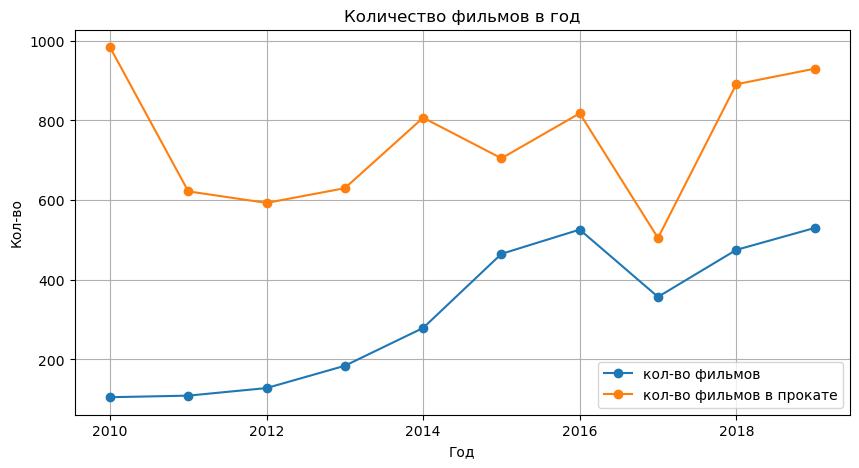

In [80]:
data.pivot_table(index= 'start_year', values = ['box_office', 'title'],aggfunc='count').plot(grid=True, style='-o',figsize=(10,5))
plt.title('Количество фильмов в год')
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.legend(['кол-во фильмов','кол-во фильмов в прокате'])
plt.show()
None


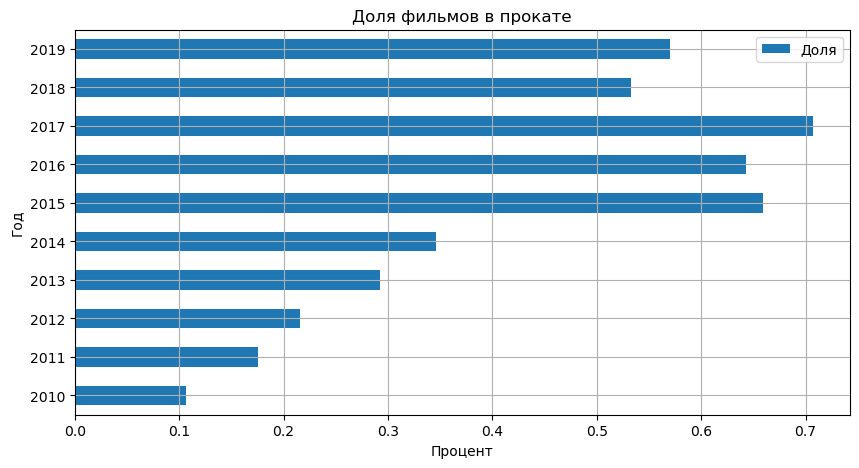

In [81]:
(data.groupby('start_year')['box_office'].count()/data.groupby('start_year')['title'].count()).plot(kind='barh',  grid=True, figsize=(10, 5))
plt.title('Доля фильмов в прокате')
plt.xlabel('Процент')
plt.ylabel('Год')
plt.legend(['Доля'])
plt.show()

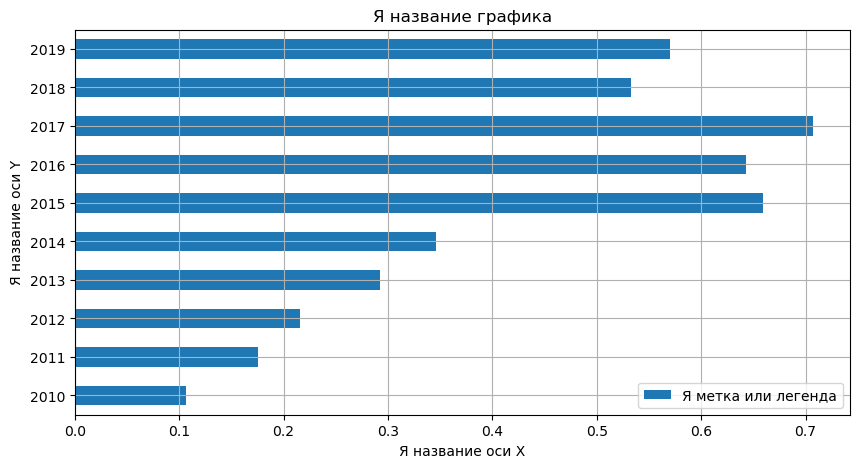

In [82]:
# Комментарий ревьюера
import matplotlib.pyplot as plt
(data.groupby('start_year')['box_office'].count()/data.groupby('start_year')['title'].count()).plot(kind='barh',  grid=True, figsize=(10, 5))
plt.title('Я название графика')
plt.xlabel('Я название оси Х')
plt.ylabel('Я название оси Y')
plt.legend(['Я метка или легенда'])
plt.show()

В 2010 году вышло наибольшее кол-во фильмов(984), с информацией в прокате о 105 фильмах и конверсия составила всего 10 %(наименьшая за все года). На втором месте по кол-ву фильмов был 2019 год с 930 и информацией в прокате о 530 фильмах, с конверсией в 57 %. Максимальная конвесия(71%) была в 2017 года, когда в прокат вышло 505 фильмов.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [83]:
data.pivot_table(index='start_year', values='box_office', aggfunc=['sum', 'min', 'max'])

,sum,min,max
,box_office,box_office,box_office
start_year,,,
2010,"2,428,654.00",0.00,"1,446,400.00"
2011,"14,102,765.00",125.00,"11,618,085.00"
2012,"6,955,423.00",0.00,"2,311,220.00"
2013,"29,799,706.20",0.00,"19,957,031.50"
2014,"7,444,951,859.20",0.00,"1,016,410,635.30"
2015,"39,497,365,196.40",0.00,"1,658,861,425.50"
2016,"47,866,299,741.91",0.00,"2,048,126,108.00"
2017,"48,563,707,217.51","7,900.00","2,779,686,144.00"


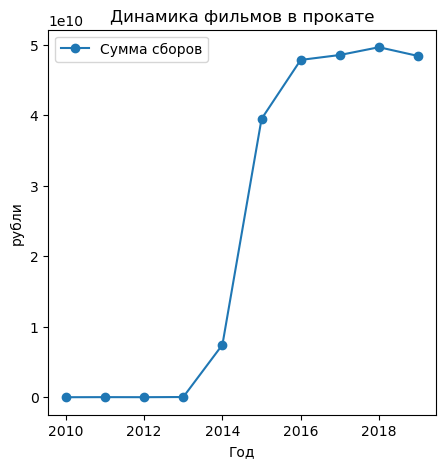

In [84]:
data.pivot_table(index='start_year', values='box_office', aggfunc='sum').plot(style='o-',figsize=(5,5))
plt.title('Динамика фильмов в прокате')
plt.xlabel('Год')
plt.ylabel('рубли')
plt.legend(['Сумма сборов'])
plt.show()
None

Динимака проката растет с каждым годом, кроме 2019 года, когда произошло небольшой спад относительно пикого  2018 года(сбор составил порядка 50 млрд.руб). Наименьшее значение было в 2010 году(2,4 млр.руб), хотя вышло наибольшое кол-во фильмов в прокат, но информация о прокате была минимальная.
Максимальный сбор за один фильм составил 3,1 млрд. руб. в 2019 году.


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [85]:
data.pivot_table(index='start_year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
start_year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"


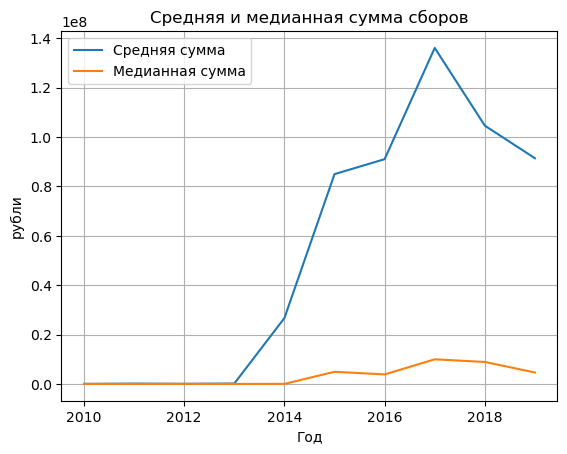

In [86]:
data.pivot_table(index='start_year', values='box_office', aggfunc=['mean', 'median']).plot(grid=True)
plt.title('Средняя и медианная сумма сборов')
plt.xlabel('Год')
plt.ylabel('рубли')
plt.legend(['Средняя сумма', 'Медианная сумма'])
plt.show()
None

Максимальное среднее значение было достигну в 2017 году  и составило 136 млн рублей, при этом медианное значение в разы ниже и максимум также был зафиксирован в 2017 году и составил порядка 10 млн.руб. Таким образом, есть часть фильмов, которые в значительной степени влияют на средний показатель.

 Видно, что разница между средней и медианной суммой сбора очень великов в каждом году.  Связано  в целом с киноиндустрией и данными, которые мы проанализироавали Т.е. есть фильмы с кассовыми сборами порядка по несколько млрд. руб.(это не основная масса), которые и влияют на средние показатели. Также, по анализу,есть аномальные значения, которые в т.ч. влияют на разницу между медианой и среднем показателем 
 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Проведем срез по фильмам в зависимости от возраста в период 2015 по 2019 год.

In [87]:
period = data.query('2015 <= start_year <= 2019')

period.pivot_table(
    index=['age_restriction', 'start_year'],
    values='box_office',
    aggfunc=['sum', 'mean', 'median']
)

sum           mean        median
                                  box_office     box_office    box_office
age_restriction start_year                                               
«0+»            2015          379,054,578.37   9,719,348.16  2,943,318.70
                2016          150,228,848.67   3,664,118.26  2,571,294.10
                2017          229,598,930.00  76,532,976.67 22,178,956.00
                2018           32,449,002.11   6,489,800.42  3,616,937.28
                2019           17,746,066.82   5,915,355.61  3,885,434.50
«12+»           2015       13,616,082,008.91 186,521,671.35 15,351,562.50
                2016       12,204,446,524.39 148,834,713.71  4,690,635.25
                2017        7,851,427,660.67 191,498,235.63  9,010,548.00
                2018       14,267,291,660.69 212,944,651.65  8,931,965.66
                2019       12,680,198,773.67 149,178,809.10  3,405,545.76
«16+»           2015       11,368,120,870.27  67,667,386.13  4,676,819.40
                2016       16,664,548,541.74  91,563,453.53  5,133,021.74
                2017       18,745,042,900.06 154,917,709.92  9,702,077.00
                2018       16,503,602,346.96 105,792,322.74  9,010,638.62
                2019       12,753,418,984.60  71,648,421.26  3,210,717.81
«18+»           2015        5,432,308,367.44  41,153,851.27  4,616,614.70
                2016        6,793,929,818.87  44,992,912.71  6,107,001.74
                2017        9,651,495,581.02  65,656,432.52  8,212,677.00
                2018        8,760,085,501.15  48,939,025.15  7,179,466.00
                2019       10,121,796,303.64  55,310,362.31  5,603,216.55
«6+»            2015        8,701,799,371.41 164,184,893.80 20,380,982.20
                2016       12,053,146,008.24 172,187,800.12  3,026,256.15
                2017       12,086,142,145.76 268,580,936.57 51,992,103.00
                2018       10,104,974,623.41 148,602,567.99 14,688,850.32
                2019       12,852,548,650.86 158,673,440.13 12,875,350.34

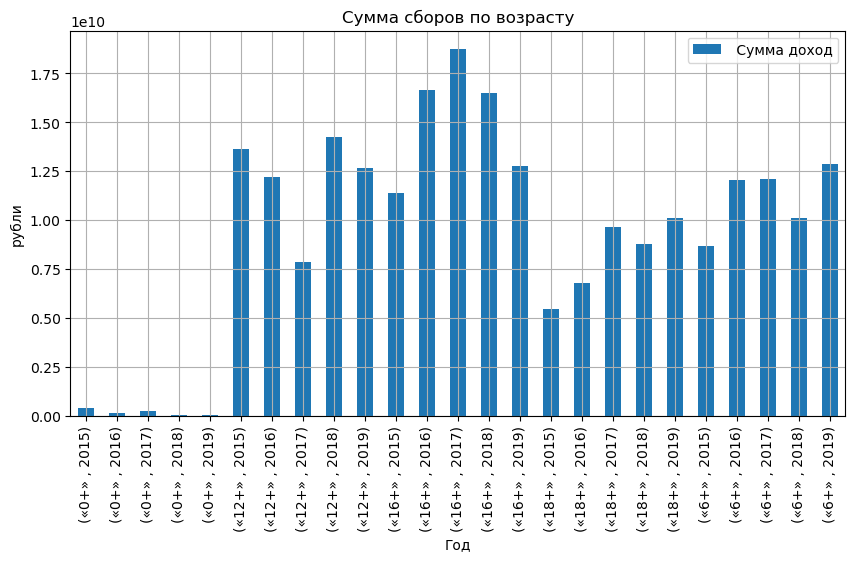

In [88]:
period.pivot_table(
    index=['age_restriction','start_year'],
    values='box_office',
    aggfunc='sum').plot(kind='bar',  grid=True, figsize=(10, 5))
plt.title('Сумма сборов по возрасту')
plt.xlabel('Год')
plt.ylabel('рубли')
plt.legend([' Сумма доход'])
plt.show()
None

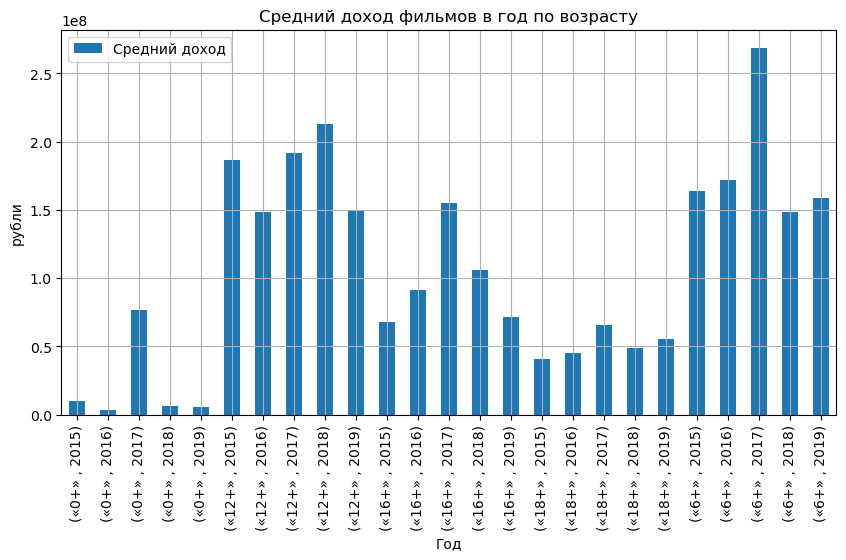

In [89]:
period.pivot_table(
    index=['age_restriction','start_year'],
    values='box_office',
    aggfunc='mean').plot(kind='bar',  grid=True, figsize=(10, 5))
plt.title('Средний доход фильмов в год по возрасту')
plt.xlabel('Год')
plt.ylabel('рубли')
plt.legend(['Средний доход'])
plt.show()
None

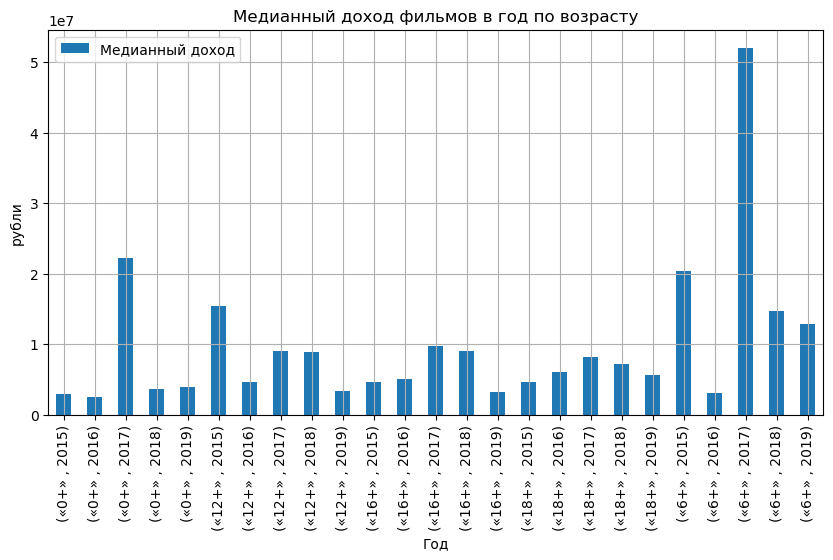

In [90]:
period.pivot_table(
    index=['age_restriction','start_year'],
    values='box_office',
    aggfunc='median').plot(kind='bar',  grid=True, figsize=(10, 5))
plt.title('Медианный доход фильмов в год по возрасту')
plt.xlabel('Год')
plt.ylabel('рубли')
plt.legend(['Медианный доход'])
plt.show()
None

    В период с 2015 по 2019 год наблюдается корреляция по сборам и возрастным ограничения, так в этот период большего всего кассовых сборов было в категории 16+, далее 12+, 6+ и 18+ соответствено, меньше всего было в категории 0+.
    Данная картина практически наблюдается во всем периоде, с небольшими коллебаниями, например, в 2015 году большего всего сборов было в категории 12+, а в 2019 году категории 6,12,16 находятся на одном уровне.
    При этом если рассматривать медианные и средние значения, то явно выбиются значения в 2017 году в категории 0+ и 6+, наверное, в этот период выходили фильмы, которые сгенерировали основную кассу.

In [91]:
def age_num(row):
    age_num = row['age_restriction']
    if '18' in age_num:
        return 18
    elif '16' in age_num:
        return 16
    elif '12' in age_num:
        return 12
    elif '0' in age_num:
        return 0
    elif '6' in age_num:
        return 6

In [92]:
data['age_num']=data.apply(age_num,axis=1)
display(data.head(10))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre,gov_support_conv,age_num
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,NaN,NaN,NaN,нет данных,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,18
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"ФГУП ""Киноконцерн ""Мосфильм""",«6+»,NaN,NaN,NaN,нет данных,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,6
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,18
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,18
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,нет данных,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,18
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,"ФГУП ""Киноконцерн ""Мосфильм""",«6+»,NaN,NaN,NaN,нет данных,7.70,драма,NaN,2016,В.Абдрашитов,драма,NaN,6
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,"ФГУП ""Киноконцерн ""Мосфильм""",«12+»,NaN,NaN,NaN,нет данных,8.30,"мелодрама,комедия","2,700.00",2013,В.Меньшов,мелодрама,NaN,12
7,Любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+»,NaN,NaN,NaN,нет данных,6.60,"мюзикл,мелодрама,комедия",NaN,2014,Джон Туртурро,мюзикл,NaN,18
8,Отпетые мошенники.,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+»,NaN,NaN,NaN,нет данных,8.00,"комедия,криминал",NaN,2016,Эрик Беснард,комедия,NaN,18
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,"ФГУП ""Киноконцерн ""Мосфильм""",«12+»,NaN,NaN,NaN,нет данных,7.80,"мелодрама,комедия",NaN,2014,В.Титов,мелодрама,NaN,12


In [93]:
display(data['age_num'].corr(data['box_office']))


-0.03086048470489754

In [94]:
data.corr( method='pearson', numeric_only=True)

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,start_year,gov_support_conv,age_num
pu_number,1.00,0.01,-0.03,-0.02,0.14,-0.02,-0.41,-0.00,0.06
refundable_support,0.01,1.00,0.36,0.64,-0.00,0.31,0.09,-0.03,-0.22
nonrefundable_support,-0.03,0.36,1.00,0.59,0.13,0.46,0.12,0.12,-0.13
budget,-0.02,0.64,0.59,1.00,0.09,0.36,0.16,-0.30,-0.18
ratings,0.14,-0.00,0.13,0.09,1.00,0.09,-0.08,-0.05,-0.07
box_office,-0.02,0.31,0.46,0.36,0.09,1.00,0.14,-0.12,-0.03
start_year,-0.41,0.09,0.12,0.16,-0.08,0.14,1.00,-0.07,0.00
gov_support_conv,-0.00,-0.03,0.12,-0.30,-0.05,-0.12,-0.07,1.00,0.15
age_num,0.06,-0.22,-0.13,-0.18,-0.07,-0.03,0.00,0.15,1.00


 Из дополнительного анализа видно, что корреляция по возрасту приближена к нулю, что говорит о том, что зависимости между возратом и суммой проката нет 
    Таким образом,В период  2015- 2019 большего всего кассовых сборов было в категории 16+, далее 12+, 6+ и 18+ соответствено, меньше всего было в категории 0+.
Данная картина практически наблюдается во всем периоде, с небольшими коллебаниями, например, в 2015 году большего всего сборов было в категории 12+, а в 2019 году категории 6,12,16 находятся на одном уровне.
При этом если рассматривать медианные и средние значения, то явно выбиются значения в 2017 году в категории 0+ и 6+, наверное, в этот период выходили фильмы, которые сгенерировали основную кассу

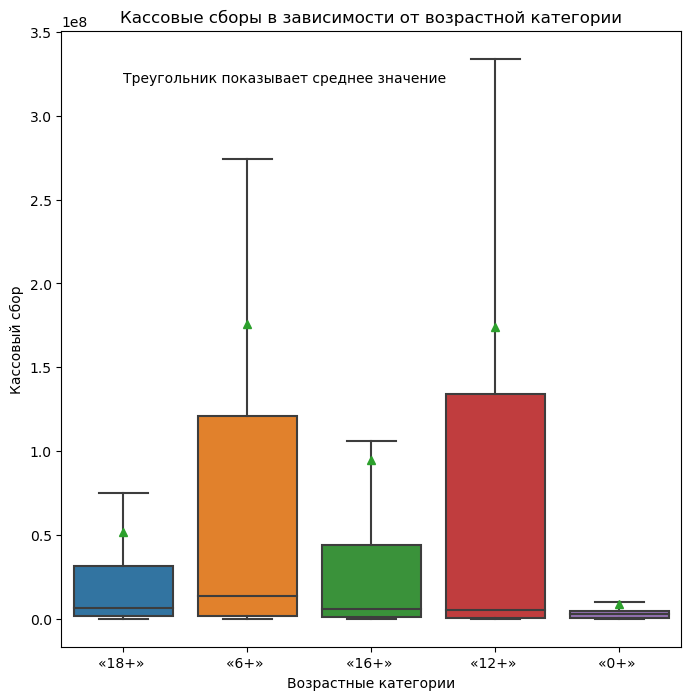

In [95]:
import seaborn as sns
temp = data.copy()
# сохраним маску для среза по годам
year_mask = (temp['start_year'] >= 2015) & (temp['start_year'] <= 2019)

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.2e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Найдем закономерности данных при финансировании фильмов,если они есть. Проанализируем кол-во/ % финансирования и оккупаемость  данных фильмов.

Выше уже был произведен процент доли финансирования от общего бюджета. Сейчас добавим столбец с общим финансированием больше нуля и проведем срез данных.

In [96]:
data['total_support']=data['refundable_support'] + data['nonrefundable_support']

In [97]:
overall_sup=data.query('total_support>0')
display(overall_sup.head(100).sort_values(by='gov_support_conv'))
display(overall_sup.describe())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre,gov_support_conv,age_num,total_support
2142,Территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+»,"30,000,000.00","30,000,000.00","500,000,000.00",Фонд кино,6.80,"детектив,фэнтези,триллер","72,578,317.40",2015,А.Мельник,детектив,0.12,12,"60,000,000.00"
2092,Батальонъ,111000715,2015-01-29 12:00:00+00:00,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,«12+»,0.00,"56,579,055.00","436,437,176.00","Министерство культуры, Фонд кино",7.10,"драма,военный,история","451,812,221.70",2015,Д.Месхиев,драма,0.13,12,"56,579,055.00"
2784,Пингвин нашего времени,111010515,2015-06-11 12:00:00+00:00,Художественный,"ЗАО ""Студия ""Ф.А.Ф."", ИКС-Фильме Креатив Пул Г...","Россия, Германия",Штефан Кромер,"Алексей Гуськов, Штефан Арндт, Андреа Шютте",«16+»,0.00,"28,000,000.00","164,780,000.00",Фонд кино,4.30,"комедия,триллер","739,938.00",2015,Штефан Кромер,комедия,0.17,16,"28,000,000.00"
2517,Норвег,111018215,2015-10-15 12:00:00+00:00,Художественный,"ООО ""Росмедиа Продакшн"" по заказу ООО ""МАРС МЕ...",Россия,Е.Константинова (псевдоним Алена Званцева),"Р.Дишдишян, ООО ""ММЕ""",«12+»,0.00,"5,000,000.00","28,115,580.00",Министерство культуры,6.30,комедия,"2,323,980.00",2015,Е.Константинова (псевдоним Алена Званцева),комедия,0.18,12,"5,000,000.00"
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+»,0.00,"27,510,000.00","131,000,000.00",Министерство культуры,7.50,"биография,военный,драма","401,804,461.90",2015,С.Мокрицкий,биография,0.21,12,"27,510,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+»,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43",2016,В.Ровенский,комедия,inf,12,"6,000,000.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+»,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40",2015,А.Андрианов,боевик,inf,12,"80,000,000.00"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+»,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51",2015,М.Местецкий,комедия,inf,18,"59,000,000.00"
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10",2014,А.Зайцев,мелодрама,inf,16,"23,000,000.00"


,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,start_year,gov_support_conv,age_num,total_support
count,332.00,332.00,332.00,332.00,316.00,318.00,332.00,332.00,332.00,332.00
mean,"111,593,819.10","11,864,457.83","48,980,988.89","127,229,716.68",6.02,"132,432,420.05","2,016.72",inf,12.55,"60,845,446.72"
std,"5,703,031.32","24,916,555.26","59,980,117.92","188,588,333.12",1.15,"334,837,856.99",1.64,NaN,4.40,"72,755,459.47"
min,"111,000,115.00",0.00,0.00,0.00,1.00,"1,550.00","2,013.00",0.04,0.00,"3,000,000.00"
25%,"111,004,891.50",0.00,"25,000,000.00","42,000,000.00",5.30,"1,236,675.50","2,015.00",0.38,12.00,"25,333,750.00"
50%,"111,010,367.00",0.00,"30,000,000.00","68,649,916.00",6.20,"15,720,067.71","2,017.00",0.61,12.00,"35,000,000.00"
75%,"111,017,815.75","15,000,000.00","40,375,000.00","141,985,319.50",6.70,"106,373,008.27","2,018.00",0.66,16.00,"60,000,000.00"
max,"214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79","2,019.00",inf,18.00,"500,000,000.00"


За весь период видно, что среднее значение по гос. поддержке за весь период составило 60 млн.руб., в этоже время медиана составляет 35 млн. руб. в данном случае влияют значительные суммы в 500 млн.руб. При этом видно, что основная часть гос. поддержки является невозвратной.
Также, среднее значение по бюджету за весь период составляет 122 млн.руб, т.е. порядка в среднем финансирование составляет порядка 50 %.

In [98]:
overall_sup.groupby('start_year')['total_support'].agg(['sum','count', 'mean','median'])

,sum,count,mean,median
start_year,,,,
2013,"134,347,945.00",2,"67,173,972.50","67,173,972.50"
2014,"572,002,299.00",16,"35,750,143.69","27,500,000.00"
2015,"3,656,241,459.00",86,"42,514,435.57","30,000,000.00"
2016,"4,303,155,482.00",61,"70,543,532.49","35,000,000.00"
2017,"3,183,971,662.00",41,"77,657,845.41","40,000,000.00"
2018,"3,446,969,465.00",56,"61,553,026.16","45,000,000.00"
2019,"4,904,000,000.00",70,"70,057,142.86","40,000,000.00"


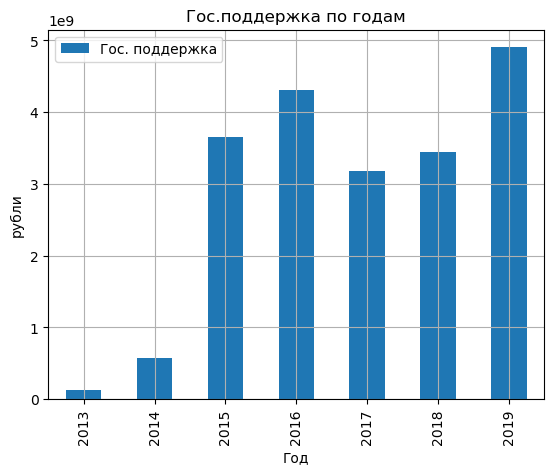

In [99]:
overall_sup.groupby('start_year')['total_support'].agg('sum').plot(kind='bar', grid=True)
plt.title('Гос.поддержка по годам')
plt.xlabel('Год')
plt.ylabel('рубли')
plt.legend(['Гос. поддержка'])
plt.show()
None


In [100]:
overall_sup.pivot_table(
    index=['age_restriction', 'start_year'],
    values='total_support',
    aggfunc=['sum', 'count','mean', 'median']
)

sum         count           mean  \
                              total_support total_support  total_support   
age_restriction start_year                                                 
«0+»            2014          90,000,000.00             2  45,000,000.00   
                2015          34,000,000.00             1  34,000,000.00   
                2016          46,520,000.00             2  23,260,000.00   
                2017         100,000,000.00             2  50,000,000.00   
                2019           3,000,000.00             1   3,000,000.00   
«12+»           2013         107,847,945.00             1 107,847,945.00   
                2014         155,502,299.00             5  31,100,459.80   
                2015       1,074,343,055.00            24  44,764,293.96   
                2016       1,715,200,000.00            24  71,466,666.67   
                2017       1,336,500,866.00            15  89,100,057.73   
                2018       1,570,000,000.00            18  87,222,222.22   
                2019       1,840,000,000.00            19  96,842,105.26   
«16+»           2013          26,500,000.00             1  26,500,000.00   
                2014         153,500,000.00             6  25,583,333.33   
                2015       1,292,598,404.00            39  33,143,548.82   
                2016       1,254,331,000.00            21  59,730,047.62   
                2017         632,123,915.00            11  57,465,810.45   
                2018         757,000,000.00            19  39,842,105.26   
                2019       1,453,000,000.00            28  51,892,857.14   
«18+»           2014         117,000,000.00             2  58,500,000.00   
                2015         189,000,000.00             5  37,800,000.00   
                2016         110,000,000.00             3  36,666,666.67   
                2017         100,346,881.00             4  25,086,720.25   
                2018         306,000,000.00             9  34,000,000.00   
                2019         190,000,000.00             5  38,000,000.00   
«6+»            2014          56,000,000.00             1  56,000,000.00   
                2015       1,066,300,000.00            17  62,723,529.41   
                2016       1,177,104,482.00            11 107,009,498.36   
                2017       1,015,000,000.00             9 112,777,777.78   
                2018         813,969,465.00            10  81,396,946.50   
                2019       1,418,000,000.00            17  83,411,764.71   

                                   median  
                            total_support  
age_restriction start_year                 
«0+»            2014        45,000,000.00  
                2015        34,000,000.00  
                2016        23,260,000.00  
                2017        50,000,000.00  
                2019         3,000,000.00  
«12+»           2013       107,847,945.00  
                2014        28,000,000.00  
                2015        36,000,000.00  
                2016        32,500,000.00  
                2017        50,000,000.00  
                2018        60,000,000.00  
                2019        30,000,000.00  
«16+»           2013        26,500,000.00  
                2014        25,000,000.00  
                2015        28,000,000.00  
                2016        30,000,000.00  
                2017        30,000,000.00  
                2018        30,000,000.00  
                2019        35,000,000.00  
«18+»           2014        58,500,000.00  
                2015        25,000,000.00  
                2016        30,000,000.00  
                2017        27,500,000.00  
                2018        30,000,000.00  
                2019        30,000,000.00  
«6+»            2014        56,000,000.00  
                2015        40,000,000.00  
                2016        60,000,000.00  
                2017        50,000,000.00  
                2018        75,000,000.00  
   

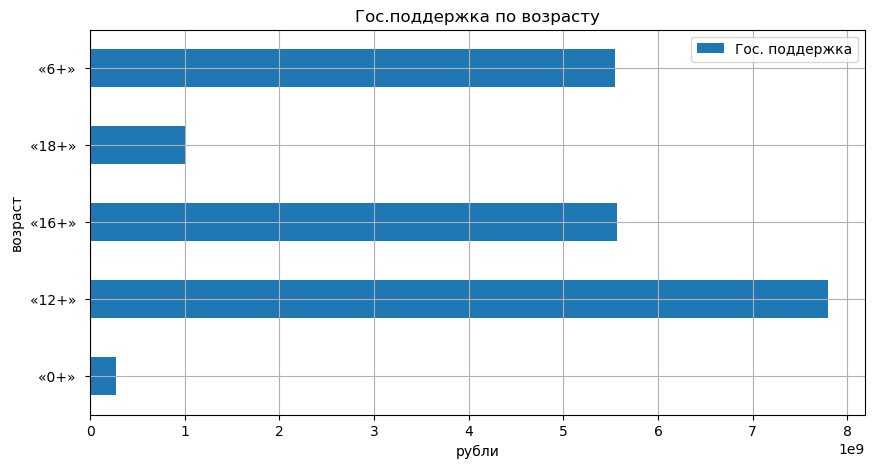

In [101]:
overall_sup.pivot_table(
    index=['age_restriction'],
    values='total_support',
    aggfunc=['sum']
).plot(kind='barh', grid=True,figsize=(10, 5))
plt.title('Гос.поддержка по возрасту')
plt.xlabel('рубли')
plt.ylabel('возраст')
plt.legend(['Гос. поддержка'])
plt.show()


In [102]:
overall_sup.pivot_table(
    index=['first_director','title','ratings','box_office'],
    values='total_support',
    aggfunc=['sum']
).sort_values(by='ratings')

,,,,sum
,,,,total_support
first_director,title,ratings,box_office,
М.Свешников,Взломать блогеров,1.00,"7,323,648.00","25,000,000.00"
Т.Кеосаян,Крымский мост. Сделано с любовью,2.50,"70,798,668.90","100,000,000.00"
О.Лопато,Богатырша,2.80,"38,334,497.27","30,000,000.00"
Ф.Коршунов при участии П.Мирзоева,Спасти Пушкина,2.90,"5,729,521.00","40,000,000.00"
А.Пиманов,Крым (2017),2.90,"342,898,736.00","50,123,915.00"
...,...,...,...,...
Р.Прыгунов,Миллиард,8.20,"408,646,665.70","140,000,000.00"
В.Тодоровский,БОЛЬШОЙ,8.50,"228,578,204.00","210,000,000.00"


Видно, что максимальный объем гос. поддержки был в 2019 году, который был практически в равных долях распределен между возрстными группа 6+,12+,16+. В целом за весь период гос. поддержку выделяют больше для фильмов 12+ и поровну на 6 и 16+, меньше всего на фильмы 0+. 
Сумма гос. поддрежки не влияет на рейтиг фильмов, как видно есть фильмы с рейтингом 9 и поддержкой в 470 тыс.руб, а есть фильмы с рейтингом не выше 3 и суммой поддержки в 100 млн.руб. 
Стоит также отметить, что финансовая поддержка по некоторым фильмам, как с высоким рейтингом,так и низким, превышает кассовые сборы этих фильмов. Таким образом, учитывая, что гос. поддержка в среднем составляет 50 % можно сказать, что окупаемость некоторых фильмов не высокая.
Посчитаем окупаемость и посмотрим в целом кассовые сборы.

In [103]:
data['invest_return']= data['box_office']-data['budget']

Убирем данные с нулем бюджетом

In [104]:
invest_ret=data['budget'].fillna(0)
invest_ret=data.query('budget>0')
display(invest_ret.head(50).sort_values(by='invest_return',ascending=False))

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre,gov_support_conv,age_num,total_support,invest_return
2205,8 новых свиданий,111014914,2014-10-30 12:00:00+00:00,Художественный,"ООО ""Смарт ТВ Продакшн""",Россия,М.Бальчюнас,"ООО ""Грин Филмс"", ООО ""ПЦ ""Горад""",«12+»,0.00,"30,000,000.00","77,401,751.00",Фонд кино,6.00,комедия,"393,344,626.30",2014,М.Бальчюнас,комедия,0.39,12,"30,000,000.00","315,942,875.30"
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+»,0.00,"27,510,000.00","131,000,000.00",Министерство культуры,7.50,"биография,военный,драма","401,804,461.90",2015,С.Мокрицкий,биография,0.21,12,"27,510,000.00","270,804,461.90"
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+»,0.00,"75,000,000.00","139,551,503.00",Фонд кино,7.00,"триллер,боевик,приключения","352,804,320.40",2015,А.Войтинский,триллер,0.54,6,"75,000,000.00","213,252,817.40"
2005,Снежная Королева 2: Перезаморозка,114000214,2014-11-13 12:00:00+00:00,Анимационный,"ООО ""ВИЗАРТ ФИЛЬМ""",Россия,А.Цицилин,"ООО ""ВИЗАРТ ФИЛЬМ"", ООО ""ТаББаК""",«0+»,"30,000,000.00","40,000,000.00","252,489,571.00",Фонд кино,6.50,"мультфильм,фэнтези,приключения","313,489,846.50",2014,А.Цицилин,мультфильм,0.28,0,"70,000,000.00","61,000,275.50"
1987,Елки Лохматые,111023114,2014-12-10 12:00:00+00:00,Художественный,"ООО ""ТаББаК""",Россия,Максим Свешников,"Тимур Бекмамбетов, Евгения Аронова",«6+»,"26,000,000.00","30,000,000.00","80,000,000.00",Фонд кино,5.00,"семейный,комедия","121,225,633.80",2014,Максим Свешников,семейный,0.70,6,"56,000,000.00","41,225,633.80"
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,нет данных,«12+»,"50,000,000.00","100,000,000.00","220,588,394.00",Фонд кино,8.50,"драма,военный,история","249,166,767.70",2015,Р.Давлетьяров,драма,0.68,12,"150,000,000.00","28,578,373.70"
2092,Батальонъ,111000715,2015-01-29 12:00:00+00:00,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,«12+»,0.00,"56,579,055.00","436,437,176.00","Министерство культуры, Фонд кино",7.10,"драма,военный,история","451,812,221.70",2015,Д.Месхиев,драма,0.13,12,"56,579,055.00","15,375,045.70"
2471,Pro любовь,111016615,2015-09-17 12:00:00+00:00,Художественный,"ООО ""Магнум-фильм""",Россия,А.Меликян,А.Меликян,«18+»,0.00,"20,000,000.00","55,195,000.00",Министерство культуры,6.60,комедия,"52,882,302.12",2015,А.Меликян,комедия,0.36,18,"20,000,000.00","-2,312,697.88"
2517,Норвег,111018215,2015-10-15 12:00:00+00:00,Художественный,"ООО ""Росмедиа Продакшн"" по заказу ООО ""МАРС МЕ...",Россия,Е.Константинова (псевдоним Алена Званцева),"Р.Дишдишян, ООО ""ММЕ""",«12+»,0.00,"5,000,000.00","28,115,580.00",Министерство культуры,6.30,комедия,"2,323,980.00",2015,Е.Константинова (псевдоним Алена Званцева),комедия,0.18,12,"5,000,000.00","-25,791,600.00"
2531,Черная вода,111018315,2015-10-09 12:00:00+00:00,Художественный,"ООО ""АРТЛАЙТ""",Россия,Р.Каримов,"А.Новиков, А.Котелевский",«16+»,0.00,"28,000,000.00","42,252,509.00",Министерство культуры,5.10,"ужасы,драма","16,077,204.00",2015,Р.Каримов,ужасы,0.66,16,"28,000,000.00","-26,175,305.00"


,sum
start_year,
2013,"-235,113,004.90"
2014,"-272,296,632.50"
2015,"-2,451,922,802.17"
2016,"-2,252,512,301.33"
2017,"3,892,942,769.20"
2018,"2,865,962,647.13"
2019,"-2,793,053,263.88"


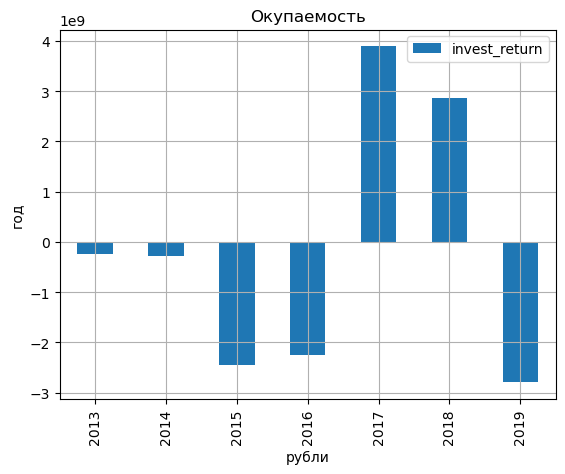

In [105]:
display(invest_ret.groupby('start_year')['invest_return'].agg(['sum']))
invest_ret.groupby('start_year')['invest_return'].agg(['sum']).plot(kind='bar', grid=True)
plt.title('Окупаемость')
plt.xlabel('рубли')
plt.ylabel('год')
plt.legend(['invest_return'])
plt.show()

In [106]:
invest_ret_2017=invest_ret.query('invest_return > 0 and start_year == 2017')
display(invest_ret_2017)
invest_ret_2018=invest_ret.query('invest_return > 0 and start_year == 2018')
display(invest_ret_2018)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre,gov_support_conv,age_num,total_support,invest_return
3224,Кухня. Последняя битва,111001517,2017-03-22 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Аврора продакшнс"" по заказу ...",Россия,А.Федотов,"Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, А.Ку...",«12+»,"50,000,000.00",0.00,"162,630,398.00",Фонд кино,6.00,комедия,"334,007,366.00",2017,А.Федотов,комедия,0.31,12,"50,000,000.00","171,376,968.00"
3255,Время первых (2017),111001317,2017-02-21 12:00:00+00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+»,"75,000,000.00","175,000,000.00","528,441,977.00",Фонд кино,7.50,"приключения,триллер,биография","544,332,260.00",2017,Д.Киселев,приключения,0.47,6,"250,000,000.00","15,890,283.00"
3321,Крым (2017),111002017,2017-04-12 12:00:00+00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,А.Пиманов,А.Пиманов,«16+»,"20,000,000.00","30,123,915.00","222,513,841.00",Фонд кино,2.90,"драма,боевик","342,898,736.00",2017,А.Пиманов,драма,0.23,16,"50,123,915.00","120,384,895.00"
3406,Везучий случай,111000417,2017-01-19 12:00:00+00:00,Художественный,"ООО Кинокомпания ""Лунапарк""",Россия,Р.Шульман,"Д.Нелидов, И.Бурец, Э.Илоян, Д.Жалинский, А.Тр...",«12+»,0.00,"50,000,000.00","110,464,061.00",Фонд кино,4.50,комедия,"123,970,133.00",2017,Р.Шульман,комедия,0.45,12,"50,000,000.00","13,506,072.00"
5449,Про любовь. Только для взрослых,111006217,2017-08-27 12:00:00+00:00,Художественный,"ООО ""Магнум-фильм""",Россия,"А.Меликян, П.Руминов, Н.Меркулова, А.Чупов, Е....",А.Меликян,«18+»,0.00,"30,000,000.00","83,553,412.00",Фонд кино,6.60,комедия,"113,925,353.00",2017,А.Меликян,комедия,0.36,18,"30,000,000.00","30,371,941.00"
5489,Жизнь впереди,111006817,2017-10-05 12:00:00+00:00,Художественный,"ООО ""КАРГО""",Россия,К.Оганесян,П.Иванова,«16+»,0.00,"30,000,000.00","57,166,797.00",Министерство культуры,5.80,комедия,"105,949,130.00",2017,К.Оганесян,комедия,0.52,16,"30,000,000.00","48,782,333.00"
5502,Салют-7,111006917,2017-10-01 12:00:00+00:00,Художественный,"ООО ""Лемон Филмз Студио""",Россия,К.Шипенко,"С.Сельянов, Б.Бакурадзе, А.Златопольский",«12+»,0.00,"225,000,000.00","493,733,957.00",Фонд кино,7.40,"драма,приключения,триллер","752,679,777.00",2017,К.Шипенко,драма,0.46,12,"225,000,000.00","258,945,820.00"
5505,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+»,"50,000,000.00","50,000,000.00","352,477,575.00",Фонд кино,6.80,"комедия,фэнтези,приключения","1,655,037,688.00",2017,Д.Дьяченко,комедия,0.28,12,"100,000,000.00","1,302,560,113.00"
5516,Фиксики. Большой секрет,114002517,2017-10-28 12:00:00+00:00,Анимационный,"ЗАО ""Аэроплан""",Россия,"А.Колпин, И.Пшонкин, В.Бедошвили",Г.Васильев,«6+»,"20,000,000.00","50,000,000.00","219,398,491.00",Фонд кино,6.90,"мультфильм,приключения,комедия","416,349,089.00",2017,А.Колпин,мультфильм,0.32,6,"70,000,000.00","196,950,598.00"
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+»,"100,000,000.00","250,000,000.00","500,012,729.00",Фонд кино,6.40,"история,боевик,фэнтези","590,405,065.00",2017,И.Шурховецкий,история,0.70,12,"350,000,000.00","90,392,336.00"


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,first_director,main_genre,gov_support_conv,age_num,total_support,invest_return
5578,Временные трудности,111007517,2018-09-13 12:00:00+00:00,Художественный,"ООО ""Энджой Мувиз""",Россия,М.Расходников,"Г.Малков, В.Поляков, М.Кучмент",«12+»,0.00,"30,000,000.00","48,680,858.00",Фонд кино,6.10,"драма,мелодрама","96,235,483.23",2018,М.Расходников,драма,0.62,12,"30,000,000.00","47,554,625.23"
5609,На районе,111011017,2018-10-04 12:00:00+00:00,Художественный,"ООО ""КМФ"" по заказу ООО ""ММЕ""",Россия,О.Зуева,"Р.Дищдишян, ООО ""ММЕ"", ИП Козловский Д.В., ООО...",«16+»,0.00,"25,000,000.00","58,447,301.00",Министерство культуры,4.70,драма,"75,927,739.98",2018,О.Зуева,драма,0.43,16,"25,000,000.00","17,480,438.98"
5620,Несокрушимый,111011117,2018-02-22 12:00:00+00:00,Художественный,"ООО ""Пиманов и партнеры""",Россия,К.Максимов,"О.Погодина, А.Пиманов, Д.Анисимов",«12+»,0.00,"50,000,000.00","150,000,000.00",Министерство культуры,5.50,"военный,драма,история","253,575,226.83",2018,К.Максимов,военный,0.33,12,"50,000,000.00","103,575,226.83"
5708,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+»,"25,000,000.00","60,000,000.00","148,585,222.00",Фонд кино,NaN,нет данных,"1,445,731,797.89",2018,О.Трофим,нет данных,0.57,12,"85,000,000.00","1,297,146,575.89"
5714,Женщины против мужчин: Крымские каникулы,111000718,2018-02-05 12:00:00+00:00,Художественный,"ООО ""Фреш-Фильм""",Россия,Л.Марголин,"А.Ананикян, С.Андреасян, Г.Андреасян",«16+»,0.00,"30,000,000.00","60,000,000.00",Министерство культуры,3.90,"комедия,мелодрама","114,925,585.76",2018,Л.Марголин,комедия,0.50,16,"30,000,000.00","54,925,585.76"
5731,О чем говорят мужчины. Продолжение,111000918,2018-02-19 12:00:00+00:00,Художественный,"ООО ""КЕДР ПРО""",Россия,Ф.Фархшатова,"Л.Барац, С.Петрейков, Р.Хаит, С.Сельянов",«16+»,0.00,"50,000,000.00","109,609,029.00",Фонд кино,6.70,комедия,"389,818,769.03",2018,Ф.Фархшатова,комедия,0.46,16,"50,000,000.00","280,209,740.03"
5749,Я худею,111001618,2018-03-07 12:00:00+00:00,Художественный,"ООО ""Друг Друга"", ООО ""Ди Пи Джи""",Россия,А.Черномазов (псевдоним Алексей Нужный),"С.Корнихин, Н.Куликов, А.Черномазов, А.Кремер,...",«16+»,0.00,"30,000,000.00","87,649,127.00",Министерство культуры,6.90,комедия,"633,462,266.74",2018,А.Черномазов (псевдоним Алексей Нужный),комедия,0.34,16,"30,000,000.00","545,813,139.74"
5826,Тренер,111003218,2018-04-19 12:00:00+00:00,Художественный,"ООО ""ДК интертеймент"", ООО ""Киностудия ""Слово""...",Россия,Д.Козловский,"Д.Козловский, П.Ануров, Л.Верещагин, А.Златопо...",«12+»,0.00,"260,000,000.00","390,191,139.00",Фонд кино,6.80,"драма,спорт","820,528,005.21",2018,Д.Козловский,драма,0.67,12,"260,000,000.00","430,336,866.21"
5852,СОБИБОР (SOBIBOR),111004318,2018-04-24 12:00:00+00:00,Художественный,"ООО ""Фонд национального кино ""Патриот""",Россия,"К.Хабенский, А.Малюков","Э.Айнулова, М.Журомская",«12+»,0.00,"60,000,000.00","298,500,000.00",Министерство культуры,6.40,"военный,драма","299,260,193.31",2018,К.Хабенский,военный,0.20,12,"60,000,000.00","760,193.31"
5869,Черновик,111004718,2018-05-25 12:00:00+00:00,Художественный,"ООО ""Компания ""Новые люди""",Россия,С.Мокрицкий,Н.Мокрицкая,«12+»,"40,000,000.00","100,000,000.00","200,067,392.00",Фонд кино,4.90,фантастика,"204,158,417.05",2018,С.Мокрицкий,фантастика,0.70,12,"140,000,000.00","4,091,025.05"


Видно, что в целом окупаемость фильмов за период отрицательная, при этом в 2017 и 2018 из совокупоности всех фильмов просматривается возврат денежных средств, при этом стоит отметить, что нет прямой зависимости от доли участия гос.подерржки в в фильме. Остальные года в целом показывают отрицательные показатели по кассовым сборам относительно бюджета фильма

### Шаг 5.Общий вывод

Целью данной работы было изучить рынок российского кинопроката и выявить текущие тренды. 

Работали с данными, опубликованными на портале открытых данных Министерства культуры. 
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Период данных с 2013 по 2019 год
Выводы:
За обработный период кол-во выпушенных фильмов в год варьируется от 500 до 1000 фильмов в год.
В 2010 году вышло наибольшее кол-во фильмов(984), с информацией в прокате о 105 фильмах и конверсия составила всего 10 %(наименьшая за все года). На втором месте по кол-ву фильмов был 2019 год с 930 и информацией в прокате о 530 фильмах, с конверсией в 57 %. Максимальная конвесия(71%) была в 2017 года, когда в прокат вышло 505 фильмов.
Стоит отметить, что в данном периоде наблюдалась позитивная динамика  из года в год с максимальным кассовым сбором в 2018 году,который составил порядка 50 млрд.руб. Наименьшее значение было в 2010 году(2,4 млр.руб).
Максимальный сбор за один фильм составил 3,1 млрд. руб. в 2019 году.

Дополнительно был изучен период с 2015 по 2019 года,в котором наблюдается корреляция по сборам и возрастным ограничения:
Так в этот период большего всего кассовых сборов было в категории 16+ (~17 млрд.руб), далее 12+ (12 млрд.руб), 6+ (10 млрд.руб) и 18+ соответствено, меньше всего было в категории 0+.
Данная картина практически наблюдается во всем периоде, с небольшими коллебаниями, например, в 2015 году большего всего сборов было в категории 12+, а в 2019 году категории 6,12,16 находятся на одном уровне.

В представленных данных фильмов  с гос. поддержкой было 303 (порядка 4 % от всех фильмов).
Средний уровень гос. финасирования в данном периоде составило 50 % от бюджета фильма( порядка 60 млн.руб). Есть пиковые значения порядка 500 млн. руб. на фильм Федора Бондорчука, которые влияют на средний показатель. Медианный показатель за этот период порядка 35 млн. руб.
В целом за весь период гос. поддержку выделяют больше для фильмов 12+ и поровну на 6 и 16+, меньше всего на фильмы 0+. Сумма гос. поддрежки не влияет на рейтиг фильмов. 
Окупаемость фильмов за период отрицательная, при этом в 2017 и 2018 из совокупоности всех фильмов просматривается возврат денежных средств, при этом стоит отметить, что нет прямой зависимости от доли участия гос.подерржки  в фильме. Остальные года в целом показывают отрицательные показатели по кассовым сборам относительно бюджета фильма
